# Preparing the data frame.

## Hate Speech Filipino Dataset (source 1).

### Load the dataset.

In [73]:
# Load the datasets from the local csv files.
# Datasets are from Hugging Face (ref: https://huggingface.co/datasets/hate_speech_filipino)

import pandas as pd

local_sub_path = 'datasets/Hate Speech Filipino/'

hate_speech_fil_train_df = pd.read_csv(local_sub_path + 'hate_speech_filipino_train.csv')
hate_speech_fil_test_df = pd.read_csv(local_sub_path + 'hate_speech_filipino_train.csv')
hate_speech_fil_validate_df = pd.read_csv(local_sub_path + 'hate_speech_filipino_validate.csv')

# Combine all the datasets into a single data frame.
hate_speech_fil_df = pd.concat([hate_speech_fil_test_df, hate_speech_fil_train_df, hate_speech_fil_validate_df])

# Reset the index of hate_speech_fil_df.
hate_speech_fil_df.reset_index(drop=True, inplace=True)

### Inspect the dataset.

In [74]:
hate_speech_fil_train_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
9995,"Mar Roxas on the rise, w/ momentum, machinery,...",0
9996,@chelseapailmao,1
9997,"Alan Cayetano 'confirms' Palace, Roxas, Poe be...",0
9998,Mas nakakainis ad ni Mar kaysa kay Binay.,1


In [75]:
hate_speech_fil_test_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
9995,"Mar Roxas on the rise, w/ momentum, machinery,...",0
9996,@chelseapailmao,1
9997,"Alan Cayetano 'confirms' Palace, Roxas, Poe be...",0
9998,Mas nakakainis ad ni Mar kaysa kay Binay.,1


In [76]:
hate_speech_fil_validate_df

,text,label
0,Escudero denies betraying Poe after meeting wi...,0
1,Hndi ko makita yung sa one more chance saka ka...,1
2,Mar Roxas is now addressing the crowd gathered...,0
3,@ImYourBaeMax perfect! Para makaharap ni Duter...,0
4,#OnlyBinayPriority4Ps Wag nating hayaan na mal...,0
...,...,...
4227,Walang katumbas na halaga ng pera ang BOTO at ...,0
4228,Mar Roxas says presidential race is now only b...,0
4229,Ms Miriam to withdraw presidency to give away ...,0
4230,"@B_RA_Ve I feel legitimately sick. Apparently,...",0


In [77]:
hate_speech_fil_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
24227,Walang katumbas na halaga ng pera ang BOTO at ...,0
24228,Mar Roxas says presidential race is now only b...,0
24229,Ms Miriam to withdraw presidency to give away ...,0
24230,"@B_RA_Ve I feel legitimately sick. Apparently,...",0


In [78]:
# Check the basic information of the data frame.
hate_speech_fil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24232 entries, 0 to 24231
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    24232 non-null  object
 1   label   24232 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 378.8+ KB


### Clean the dataset.

In [79]:
# Check for null values.
hate_speech_fil_df.isnull().sum()

text     0
label    0
dtype: int64

In [80]:
# Check for duplicates.
hate_speech_fil_df.duplicated().sum()

10356

In [81]:
# Show the duplicates.
hate_speech_fil_df[hate_speech_fil_df.duplicated()]


,text,label
452,#NogNogHambog,1
481,#OnlyBinayInMakatiSanKaPa,0
543,#OnlyBinayInMakatiSanKaPa,0
576,#OnlyBinayInMakatiSanKaPa,0
598,#OnlyBinayUNAsaIlocos,0
...,...,...
24013,#OnlyBinayUNAsaIlocos,0
24029,#onlybinay,0
24042,#PHvote,0
24158,#PiliPinasDebates2016,1


In [82]:
# Drop the duplicates.
hate_speech_fil_df.drop_duplicates(inplace=True)

# Reset the index.
hate_speech_fil_df.reset_index(drop=True, inplace=True)

In [83]:
# Check for the duplicates again.
hate_speech_fil_df.duplicated().sum()

0

In [84]:
hate_speech_fil_df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
13871,Walang katumbas na halaga ng pera ang BOTO at ...,0
13872,Mar Roxas says presidential race is now only b...,0
13873,Ms Miriam to withdraw presidency to give away ...,0
13874,"@B_RA_Ve I feel legitimately sick. Apparently,...",0


## Toxic Tweets Dataset (source 2).

### Load the dataset.

In [85]:
# Load the dataset from the local csv file.
# Dataset is from Kaggle (ref: https://www.kaggle.com/datasets/ashwiniyer176/toxic-tweets-dataset)

local_sub_path = 'datasets/Toxic Tweets/'

raw_toxic_tweets_df = pd.read_csv(local_sub_path + 'FinalBalancedDataset.csv')

### Inspect the dataset.

In [86]:
raw_toxic_tweets_df

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation
...,...,...,...
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies


In [87]:
# Check the basic information of the data frame.
raw_toxic_tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56745 entries, 0 to 56744
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  56745 non-null  int64 
 1   Toxicity    56745 non-null  int64 
 2   tweet       56745 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


### Clean the dataset.

In [88]:
# Check for null values.
raw_toxic_tweets_df.isnull().sum()

Unnamed: 0    0
Toxicity      0
tweet         0
dtype: int64

In [119]:
# Check for duplicates.
raw_toxic_tweets_df.duplicated().sum()

0

### Restructure the data frame.

In [90]:
# The data frame should have only a text and label features.

toxic_tweets_df = raw_toxic_tweets_df.copy()
toxic_tweets_df.rename(columns={'tweet': 'text', 'Toxicity': 'label'}, inplace=True)
toxic_tweets_df = toxic_tweets_df[['text', 'label']]

toxic_tweets_df

,text,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0
...,...,...
56740,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
56741,"you've gone and broke the wrong heart baby, an...",1
56742,young buck wanna eat!!.. dat nigguh like I ain...,1
56743,youu got wild bitches tellin you lies,1


### Clean the dataset again.

In [121]:
# Check for duplicates.
toxic_tweets_df.duplicated().sum()

2432

In [122]:
# Show the duplicates.
toxic_tweets_df[toxic_tweets_df.duplicated()]

,text,label
46,#model i love u take with u all the time in ...,0
96,#model i love u take with u all the time in ...,0
117,#model i love u take with u all the time in ...,0
162,#model i love u take with u all the time in ...,0
218,#model i love u take with u all the time in ...,0
...,...,...
31886,100 amazing health benefits of cucumbers! #...,0
31904,#model i love u take with u all the time in ...,0
31930,@user #feminismiscancer #feminismisterrorism #...,1
31951,i've just posted a new blog: #secondlife #lone...,0


In [123]:
# Drop the duplicates.
toxic_tweets_df.drop_duplicates(inplace=True)

# Reset the index.
toxic_tweets_df.reset_index(drop=True, inplace=True)

toxic_tweets_df

,text,label
0,@user when a father is dysfunctional and is s...,0
1,@user @user thanks for #lyft credit i can't us...,0
2,bihday your majesty,0
3,#model i love u take with u all the time in ...,0
4,factsguide: society now #motivation,0
...,...,...
54308,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
54309,"you've gone and broke the wrong heart baby, an...",1
54310,young buck wanna eat!!.. dat nigguh like I ain...,1
54311,youu got wild bitches tellin you lies,1


In [124]:
# Recheck for duplicates.
toxic_tweets_df.duplicated().sum()

0

## Combine the different data frames.

In [125]:
# Make a single data frame for all the datasets.

df = pd.concat([hate_speech_fil_df, toxic_tweets_df])
df

,text,label
0,Inaasahan na ni Vice President Jejomar Binay n...,0
1,Mar Roxas TANG INA TUWID NA DAAN DAW .. EH SYA...,1
2,Salamat sa walang sawang suporta ng mga taga m...,0
3,@rapplerdotcom putangina mo binay TAKBO PA,1
4,"Binay with selective amnesia, forgetting about...",0
...,...,...
54308,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,1
54309,"you've gone and broke the wrong heart baby, an...",1
54310,young buck wanna eat!!.. dat nigguh like I ain...,1
54311,youu got wild bitches tellin you lies,1


## Creating a Train and Test sets

In [133]:
X = df['text']
y = df['label']

print(X.shape)
print(y.shape)

(68189,)
(68189,)


In [134]:
# Split X and y into training and testing sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(51141,)
(17048,)
(51141,)
(17048,)


## Vectorizing the dataset

In [136]:
# Instantiate the CountVectorizer.

from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer()

In [137]:
# Learn the training data vocabulary, then use it to create a document-term matrix.

cvect.fit(X_train)

CountVectorizer()

In [138]:
# Examine the fitted vocabulary.

feature_names = cvect.get_feature_names_out()
print(feature_names)
print('len:', len(feature_names))
pd.DataFrame(feature_names)


['00' '000' '0000000000000' ... 'ð¾ñ' 'ó¾' 'ø¹ù']
len: 69405


,0
0,00
1,000
2,0000000000000
3,000001
4,002
...,...
69400,ð¾ð½ð
69401,ð¾ð½ðµð
69402,ð¾ñ
69403,ó¾


In [139]:
# Transform the training data into a document-term matrix.

# X_train_dtm = vect.transform(X_train)
X_train_dtm = cvect.fit_transform(X_train)

In [140]:
# Examine the document-term matrix.

X_train_dtm

<51141x69405 sparse matrix of type '<class 'numpy.int64'>'
	with 640492 stored elements in Compressed Sparse Row format>

In [141]:
# Transform the testing data (using fitted vocabulary) into a document-term matrix.

X_test_dtm = cvect.transform(X_test)
X_test_dtm

<17048x69405 sparse matrix of type '<class 'numpy.int64'>'
	with 197294 stored elements in Compressed Sparse Row format>

# Building and Evaluating the model

## Building the model.

In [142]:
# Import and instantiate a Multinomial Naive Bayes model.

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

In [143]:
# Train the model using X_train_dtm and the fit() method.

mnb.fit(X_train_dtm, y_train)

MultinomialNB()

## Evaluating the model

In [144]:
# Make class predictions for the X_test_dtm. Store it in the y_pred_class variable.

y_pred_class = mnb.predict(X_test_dtm)

In [145]:
# Calculate the accuracy of the predictions.

from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_class)

0.8756452369779446

array([[8181, 1244],
       [ 876, 6747]], dtype=int64)

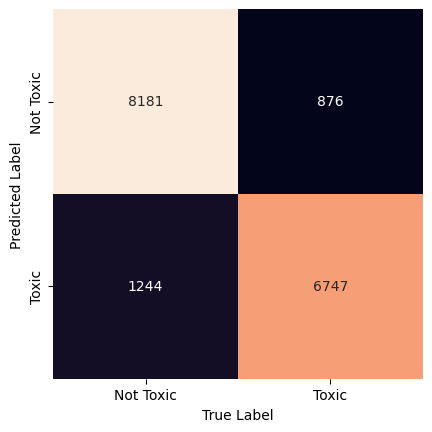

In [146]:
# Print the confusion matrix.

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=['Not Toxic', 'Toxic'], yticklabels=['Not Toxic', 'Toxic'])
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

metrics.confusion_matrix(y_test, y_pred_class)

In [147]:
# Print the classification report.

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      9425
           1       0.84      0.89      0.86      7623

    accuracy                           0.88     17048
   macro avg       0.87      0.88      0.87     17048
weighted avg       0.88      0.88      0.88     17048



In [148]:
# Show the predicted probabilities for the X_test_dtm.

y_pred_prob = mnb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([9.38229650e-01, 5.90445849e-05, 9.99848219e-01, ...,
       3.75409840e-07, 9.10258430e-01, 1.90790743e-01])

In [149]:
# Build a data frame with the input text, actual class, predicted class, and the predicted probabilities.

test_results_df = pd.DataFrame({'text': X_test, 'actual': y_test, 'predicted': y_pred_class, 'prob': y_pred_prob})
test_results_df


,text,actual,predicted,prob
19923,pussy free pics nude mature,0,1,9.382297e-01
27194,time to hot tub in the rain. excellent way to ...,0,0,5.904458e-05
53462,hoes need to stay in hoes place fr,1,1,9.998482e-01
23075,@user that's cos too many people are hung up b...,0,0,2.382413e-01
29314,@user officially packed half of my hospital b...,0,0,2.639174e-06
...,...,...,...,...
51549,This bitch!,1,1,9.949751e-01
32238,@Buckm00se true sand niggers &amp; bum Brits c...,1,1,9.179412e-01
7793,@user @user @user #thnkz 4 ua commitment as...,0,0,3.754098e-07
7121,Hala! Napanood ko na yung ad ni Binay!!,1,1,9.102584e-01


# Hypertuning the parameters.

## Making a custom stop words.

In [150]:
# Making a custom stop words list that includes the Filipino language.

# Built-in English stop words.
english_stop_words = CountVectorizer(stop_words='english').get_stop_words()

# Generated by ChatGPT.
filipino_stop_words1 = [
    "ako", "akin", "ako'y", "amin", "aming", "ang", "ano", "anuman", "apat", "at", "atin", "ating",
    "ay", "bababa", "bago", "bakit", "bawat", "bilang", "dahil", "dalawa", "dapat", "din", "dito", "doon",
    "gagawin", "gayunman", "ginagawa", "ginawa", "ginawang", "gumawa", "gusto", "habang", "hanggang", "hindi", "huwag", "iba",
    "ibaba", "ibabaw", "ibig", "ikaw", "ilagay", "ilalim", "ilan", "inyong", "isa", "isang", "ito", "iyo",
    "iyon", "iyong", "ka", "kahit", "kailangan", "kailanman", "kami", "kanila", "kanilang", "kanino", "kanya", "kanyang",
    "kapag", "kapwa", "karamihan", "katiyakan", "katulad", "kay", "kaya", "kaysa", "ko", "kung", "laban",
    "lahat", "lamang", "likod", "lima", "maaari", "maaaring", "maging", "mahusay", "makita", "marami", "marapat", "mga",
    "minsan", "mismo", "mula", "muli", "na", "nabanggit", "naging", "nagkaroon", "nais", "nakita", "namin", "napaka",
    "narito", "nasaan", "ng", "nga", "ngayon", "ni", "nila", "nilang", "nito", "niya", "niyang", "noon",
    "o", "pag", "pala", "para", "pati", "pero", "pumunta", "pumupunta", "sa", "saan", "sabi", "sabihin",
    "sarili", "si", "sila", "sino", "siya", "tatlo", "tayo", "tulad", "tungkol", "una", "walang"
]

# From an open-source GitHub repo (ref: https://github.com/stopwords-iso/stopwords-tl).
filipino_stop_words2 = [
    'ako', 'sa', 'akin', 'ko', 'aking', 'sarili', 'kami', 'atin', 'ang', 'aming', 'amin', 'ating',
    'ka', 'iyong', 'iyo', 'inyong', 'siya', 'kanya', 'mismo', 'ito', 'nito', 'kanyang', 'sila', 'nila',
    'kanila', 'kanilang', 'kung', 'ano', 'alin', 'sino', 'kanino', 'na', 'mga', 'iyon', 'am', 'ay',
    'maging', 'naging', 'mayroon', 'may', 'nagkaroon', 'pagkakaroon', 'gumawa', 'ginagawa', 'ginawa', 'paggawa',
    'ibig', 'dapat', 'maaari', 'marapat', 'kong', 'ikaw', 'tayo', 'hindi', 'namin', 'gusto', 'nais',
    'niyang', 'nilang', 'niya', 'huwag', 'ginawang', 'gagawin', 'maaaring', 'sabihin', 'narito', 'kapag', 'ni',
    'nasaan', 'bakit', 'paano', 'kailangan', 'walang', 'katiyakan', 'isang', 'at', 'pero', 'o', 'dahil',
    'bilang', 'hanggang', 'habang', 'ng', 'pamamagitan', 'para', 'tungkol', 'laban', 'pagitan', 'panahon', 'bago',
    'pagkatapos', 'itaas', 'ibaba', 'mula', 'pataas', 'pababa', 'palabas', 'ibabaw', 'ilalim', 'muli', 'pa',
    'minsan', 'dito', 'doon', 'saan', 'lahat', 'anumang', 'kapwa', 'bawat', 'ilan', 'karamihan', 'iba', 'tulad',
    'lamang', 'pareho', 'kaya', 'kaysa', 'masyado', 'napaka', 'isa', 'bababa', 'kulang', 'marami', 'ngayon',
    'kailanman', 'sabi', 'nabanggit', 'din', 'kumuha', 'pumunta', 'pumupunta', 'ilagay', 'makita', 'nakita',
    'katulad', 'mahusay', 'likod', 'kahit', 'paraan', 'noon', 'gayunman', 'dalawa', 'tatlo', 'apat', 'lima',
    'una', 'pangalawa'
]

# Get the union of the two filipino stop words lists.
filipino_stop_words = list(set(filipino_stop_words1).union(set(filipino_stop_words2)))

# Get the union of the english and filipino stop words lists.
custom_stop_words = list(english_stop_words.union(filipino_stop_words))


## Search for the optimal parameters.

In [151]:
# # Hyperparameter tuning using GridSearchCV.

# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline

# # Create a pipeline with CountVectorizer and MultinomialNB.
# pipe = Pipeline([
#     ('cvec', CountVectorizer()),
#     ('mnb', MultinomialNB())
# ])

# # Create a dictionary of parameters to search.
# params = {
#     'cvec__stop_words': [custom_stop_words],
#     'cvec__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)],
#     'cvec__min_df': [1, 2, 3, 4, 5],
#     'cvec__max_df': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5],
#     'mnb__alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
# }

# # Instantiate GridSearchCV.
# gs = GridSearchCV(pipe, param_grid=params, cv=5, verbose=2, n_jobs=-1, scoring='accuracy', refit=True)

# # Fit GridSearch to training data.
# gs.fit(X_train, y_train)
# gs.best_params_

## Using the new parameters.

In [152]:
# Build a new model using the best parameters.

cvect = CountVectorizer(stop_words=custom_stop_words, ngram_range=(1, 1), max_df=0.5, min_df=2)
mnb = MultinomialNB(alpha=0.1)

# Vectorize the data.
X_train_dtm = cvect.fit_transform(X_train)
X_test_dtm = cvect.transform(X_test)

# Fit the data to the model.
mnb.fit(X_train_dtm, y_train)
y_pred_class = mnb.predict(X_test_dtm)

# Check accuracy.
metrics.accuracy_score(y_test, y_pred_class)

0.880161895823557

In [153]:
# # Traverse the hate_speech_fil_df per row and remove the substrings text entry
# # that starts with @, http, or https.

# import re

# for index, row in hate_speech_fil_df.iterrows():
#     hate_speech_fil_df.loc[index, 'text'] = re.sub(r'@\S+', '', hate_speech_fil_df.loc[index, 'text'])
#     hate_speech_fil_df.loc[index, 'text'] = re.sub(r'http\S+', '', hate_speech_fil_df.loc[index, 'text'])
#     hate_speech_fil_df.loc[index, 'text'] = re.sub(r'https\S+', '', hate_speech_fil_df.loc[index, 'text'])
    

In [154]:
# # Split X and y into training and testing sets.
# X = hate_speech_fil_df['text']
# y = hate_speech_fil_df['label']
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

# # Instantiate CountVectorizer.
# cvect = CountVectorizer(stop_words=custom_stop_words, ngram_range=(1, 1), max_df=0.3, min_df=2)

# # Transform the training data into a document-term matrix.
# X_train_dtm = cvect.fit_transform(X_train)

# # Transform the testing data (using fitted vocabulary) into a document-term matrix.
# X_test_dtm = cvect.transform(X_test)

# # Import and instantiate a Multinomial Naive Bayes model.
# mnb = MultinomialNB(alpha=0.1)

# # Train the model using X_train_dtm and the fit() method.
# mnb.fit(X_train_dtm, y_train)

# # Make class predictions for the X_test_dtm. Store it in the y_pred_class variable.
# y_pred_class = mnb.predict(X_test_dtm)

# # Calculate the accuracy of the predictions.
# metrics.accuracy_score(y_test, y_pred_class)
